<a href="https://colab.research.google.com/github/SRIJEETA-MAITY/ml_ybi_hand_written/blob/main/Hand_written_digit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# IMPOrtiNG DATA
from sklearn.datasets import load_digits

In [4]:
# creating data frame
df=load_digits()
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

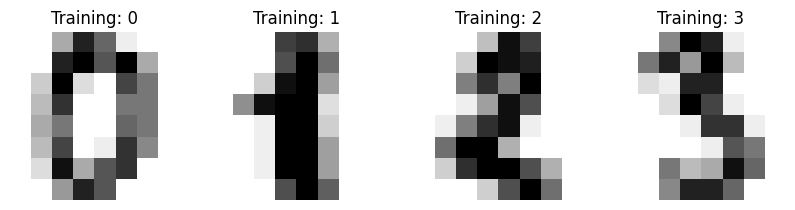

In [5]:
_, axes = plt.subplots(nrows=1,ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [6]:
# data Preprocessing
df.images.shape

(1797, 8, 8)

In [7]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
df.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

In [14]:
data.shape

(1797, 64)

In [16]:
# scaling Imges
data.min()

0.0

In [17]:
data.max()


16.0

In [18]:
data=data/16

In [19]:
data.min()
data.max()

1.0

In [20]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [23]:
X_train.shape

(1257, 64)

In [24]:
print(X_train.shape)
print(X_test.shape)

(1257, 64)
(540, 64)


In [25]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
# predict test data
y_pred=rf.predict(X_test)

In [28]:
y_pred

array([9, 3, 9, 1, 5, 5, 4, 1, 9, 5, 2, 5, 1, 1, 2, 3, 3, 8, 7, 1, 3, 0,
       6, 8, 7, 2, 9, 3, 0, 1, 0, 1, 2, 0, 8, 0, 3, 6, 3, 9, 3, 8, 9, 6,
       9, 3, 4, 0, 0, 3, 9, 2, 4, 1, 7, 9, 8, 2, 5, 4, 0, 3, 5, 0, 2, 4,
       0, 0, 5, 7, 4, 9, 1, 6, 7, 5, 5, 6, 1, 0, 7, 4, 5, 4, 6, 6, 3, 4,
       7, 6, 1, 0, 6, 4, 3, 3, 6, 8, 4, 1, 9, 5, 2, 9, 0, 1, 8, 8, 0, 3,
       0, 3, 1, 3, 9, 3, 9, 4, 9, 1, 8, 5, 8, 4, 8, 7, 2, 6, 3, 7, 9, 9,
       9, 4, 6, 8, 0, 2, 4, 0, 9, 5, 7, 3, 1, 8, 2, 7, 8, 3, 2, 6, 3, 5,
       4, 6, 3, 6, 7, 9, 7, 4, 0, 1, 7, 4, 8, 7, 6, 8, 4, 9, 3, 5, 5, 4,
       3, 5, 0, 2, 2, 4, 3, 1, 4, 9, 1, 4, 4, 4, 2, 3, 6, 2, 9, 0, 7, 5,
       3, 5, 9, 5, 4, 7, 2, 5, 1, 1, 2, 4, 8, 6, 4, 1, 3, 5, 6, 2, 5, 4,
       1, 8, 4, 4, 9, 0, 9, 3, 8, 8, 9, 2, 6, 0, 1, 3, 4, 3, 0, 9, 3, 1,
       9, 1, 5, 4, 4, 1, 9, 4, 2, 1, 1, 8, 9, 0, 8, 4, 2, 4, 7, 7, 9, 7,
       1, 1, 4, 1, 5, 5, 2, 2, 7, 9, 1, 4, 3, 5, 7, 5, 1, 2, 6, 6, 7, 7,
       1, 1, 6, 7, 1, 4, 7, 8, 0, 4, 6, 9, 0, 3, 8,

In [29]:
# model accuracy
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
confusion_matrix(y_test,y_pred)

array([[56,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 69,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1, 54,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  2, 41,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  0, 54]])

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.98      1.00      0.99        56
           2       1.00      1.00      1.00        43
           3       1.00      0.98      0.99        54
           4       0.99      0.97      0.98        71
           5       0.95      0.96      0.96        56
           6       1.00      0.98      0.99        54
           7       0.92      0.98      0.95        49
           8       0.91      0.93      0.92        44
           9       1.00      0.95      0.97        57

    accuracy                           0.98       540
   macro avg       0.97      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

